In [305]:
import pandas as pd
import re
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
def read_advanced_season_stats(filepath):
    '''
    Function reads in the file at 'filepath' and returns a dataframe of the advanced stats
    Inputs: filepath--a path to the file (*advanced.csv)
    Returns: dataframe of per season advanced stats
    '''
    df = pd.read_csv(filepath)
    #pull the seasonal years from the filepath
    years = re.findall(r"\d\d\d\d",filepath)
    #remove the "blank" columns that were added via the data mining recipe
    df.drop(['Blank', 'Blank.1'], axis=1, inplace=True)
    #Get the ending year for the season
    df['Season'] = int(years[-1])
    
    #Handle multiple teams, initialize to the 'Tm' field
    df['Teams'] = df['Tm']
    
    #Get rid of multiple rows per season per player
    df = reduce_traded_players_to_one_row(df)
    
    return df #.sort_values(['Season', 'Player'], ascending=[True, True])

In [307]:
def read_pergame_season_stats(filepath):
    '''
    Function reads in the file at 'filepath' and returns a dataframe of the per_game stats
    Inputs: filepath--a path to the file (*advanced.csv)
    Returns: dataframe of per season advanced stats
    '''
    df = pd.read_csv(filepath)
    #pull the seasonal years from the filepath
    years = re.findall(r"\d\d\d\d",filepath)
    df['Season'] = int(years[-1])
    
    #handle mulitple teams, initizlize to the 'Tm' field
    df['Teams'] = df['Tm']
    
    #Get rid of multiple rows per season per player
    df = reduce_traded_players_to_one_row(df)
    
    return df #.sort_values(['Season', 'Player'], ascending=[True, True])

In [308]:
df0607 = read_advanced_season_stats('../data/advanced/2006-2007_player_advanced.csv')

In [309]:
def reduce_traded_players_to_one_row(df):
    '''
    Reduces the traded players in the dataframe to one row.  Should be called on an individual seasonal dataframe
    because that's how the function was tested. Puts the invidual teams in a comma-delimited string
    ***Original DF is modified by this function***
    
    Input: seasonal dataframe (per_game or advanced)
    return: formatted dataframe (the same one passed in) with one row per payer
    '''
    #Each player that has been traded has 'TOT' in the Team column
    for player in df[df['Tm']=='TOT']['Player']:
        #get the unique teams in the list
        teams = list(df[df['Player']==player]['Tm'].unique())
        #remove the 'TOT' in the list
        teams.remove('TOT')
        #print('Should append: ', ','.join(teams))
        
        #Put the multiple teams in the 'Teams' field for the TOT column and player
        df.loc[(df['Tm']=='TOT') & (df['Player']==player), 'Teams'] = ','.join(teams)
        
    #Because the 'TOT' row appears first, we can drop duplicates
    df.drop_duplicates(subset=['Player'], inplace=True)
    
    return df
        
    
        
        
        
        

In [310]:
df0506pg = read_pergame_season_stats('../data/per_game/2005-2006_Player_per_game.csv')

In [192]:
df0506pg.head().T

,0,1,2,3,4
Rk,1,2,3,4,5
Player,Shareef Abdur-Rahim,Alex Acker,Malik Allen,Ray Allen*,Tony Allen
Pos,PF,SG,PF,SG,PG
Age,29,23,27,30,24
Tm,SAC,DET,CHI,SEA,BOS
G,72,5,54,78,51
GS,30,0,20,78,9
MP,27.2,7,13,38.7,19.2
FG,4.6,0.8,2.2,8.7,2.5
FGA,8.8,3.2,4.6,19.2,5.4


In [45]:
df0506pg[df0506pg.isnull().any(axis=1)].T

,1,6,12,26,27,38,42,46,47,48,...,512,517,521,523,534,537,542,543,544,562
Rk,2,7,11,19,20,25,29,33,33,33,...,418,423,427,429,438,439,442,442,442,458
Player,Alex Acker,Chris Andersen,Martynas Andriuskevicius,Stacey Augmon,Vin Baker,Earl Barron,Brandon Bass,Lonny Baxter,Lonny Baxter,Lonny Baxter,...,Jackson Vroman,Samaki Walker,Matt Walsh,Hakim Warrick,Robert Whaley,Chris Wilcox,Aaron Williams,Aaron Williams,Aaron Williams,Derrick Zimmerman
Pos,SG,C,C,SF,C,C,PF,C-PF,C,PF,...,PF,PF,SG,PF,C,PF,C,C,C,PG
Age,23,27,19,37,34,24,20,27,27,27,...,24,29,23,23,23,23,34,34,34,24
Tm,DET,NOK,CLE,ORL,LAC,MIA,NOK,TOT,HOU,CHA,...,NOK,IND,MIA,MEM,UTA,SEA,TOT,TOR,NOK,NJN
G,5,32,6,36,8,8,29,41,23,18,...,41,7,2,68,23,29,48,14,34,2
GS,0,2,0,3,1,0,1,0,0,0,...,2,0,0,2,0,23,5,3,2,0
MP,7,17.8,1.5,10.7,10.6,5.6,9.2,9.8,12.2,6.6,...,9.9,3.1,1.5,10.6,9.2,30.1,16.5,7.1,20.4,16
FG,0.8,1.8,0,0.7,0.9,0.6,1,1.1,1.4,0.7,...,0.6,0,0.5,1.5,1,5.8,1.9,0.7,2.4,1
FGA,3.2,3.1,0.2,2,1.9,2,2.4,2.5,3.1,1.8,...,1.6,0.3,0.5,3.4,2.5,9.7,3.7,1.4,4.6,1.5


Some of the rows have NANs in them, probably from players who do not have many minutes across the season.  Or they just never shot a 3, or they never took a freethrow, or something to that effect.

In [193]:
df0607.info()
df0607[df0607.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 28 columns):
Rk        516 non-null int64
Player    516 non-null object
Pos       516 non-null object
Age       516 non-null int64
Tm        516 non-null object
G         516 non-null int64
MP        516 non-null int64
PER       516 non-null float64
TS%       513 non-null float64
3PAr      513 non-null float64
FTr       513 non-null float64
ORB%      516 non-null float64
DRB%      516 non-null float64
TRB%      516 non-null float64
AST%      516 non-null float64
STL%      516 non-null float64
BLK%      516 non-null float64
TOV%      513 non-null float64
USG%      516 non-null float64
OWS       516 non-null float64
DWS       516 non-null float64
WS        516 non-null float64
WSp48     516 non-null float64
OBPM      516 non-null float64
DBPM      516 non-null float64
BPM       516 non-null float64
VORP      516 non-null float64
Season    516 non-null int64
dtypes: float64(20), int64(5), object(3)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season
9,9,Lou Amundson,PF,24,UTA,1,2,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.004,-5.3,0.2,-5.1,0.0,2007
94,88,Will Conroy,SG,24,MEM,3,17,4.2,NaN,NaN,...,0.0,0.0,0.0,0.0,0.035,-2.9,-0.1,-3.1,0.0,2007
398,351,Jeremy Richardson,SF,22,POR,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.021,-5.7,-0.2,-5.8,0.0,2007


In [194]:
df0607[df0607.isnull().any(axis=1)].T

,9,94,398
Rk,9,88,351
Player,Lou Amundson,Will Conroy,Jeremy Richardson
Pos,PF,SG,SF
Age,24,24,22
Tm,UTA,MEM,POR
G,1,3,1
MP,2,17,1
PER,0,4.2,0
TS%,NaN,NaN,NaN
3PAr,NaN,NaN,NaN


In [195]:
listdir('../data/advanced')

['1998-1999_player_advanced.csv',
 '2006-2007_player_advanced.csv',
 '2007-2008_player_advanced.csv',
 '2015-2016_player_advanced.csv',
 '2011-2012_player_advanced.csv',
 '2003-2003_player_advanced.csv',
 '2010-2011_player_advanced.csv',
 '1999-2000_player_advanced.csv',
 '2014-2015_player_advanced.csv',
 '2003-2004_player_advanced.csv',
 '2012-2013_player_advanced.csv',
 '2001-2002_player_advanced.csv',
 '2017-2018_player_advanced.csv',
 '1997-1998_player_advanced.csv',
 '2016-2017_player_advanced.csv',
 '1996-1997_player_advanced.csv',
 '2008-2009_player_advanced.csv',
 '2005-2006_player_advanced.csv',
 '2004-2005_player_advanced.csv',
 '2009-2010_player_advanced.csv',
 '2013-2014_player_advanced.csv',
 '2000-2001_player_advanced.csv']

In [196]:
def read_all_advanced(pathtodir):
    '''
    Read every advanced stat file into separate dataframes
    Concats the per_season dataframes together, and returns a big dataframe 
    
    Input: pathtodir -- the path to the directory that contains the per_season advanced stat csv files
    NOTE: the directory should only have advanced stat files within.  Do not mix file types.
    Returns: dataframe of all advanced stats, uncleaned
    '''
    #get the individual files
    files = listdir(pathtodir)
    #get a list of dataframes, one for every file
    dataframes = [read_advanced_season_stats(pathtodir + '/' + file) for file in files]
    #assemble the dataframes together, and return them.
    return pd.concat(dataframes).sort_values(['Season', 'Player'], ascending=[True, True])

In [197]:
def read_all_pergame(pathtodir):
    '''
    Read every per_game stat file (one for each season) into separate dataframes
    Concats the per_game dataframes together, and returns a dataframe that contain the per_game_stats for every
    season in the directory
    
    Input: pathtodir -- the path to the directory that contains the per_season per_game stat csv files
    NOTE: the directory should only have per_game stat files within.  Do not mix file types within the directory.
    Returns: dataframe of all per_game stats, uncleaned
    '''
    #get the individual files
    files = listdir(pathtodir)
    #print(files)
    #get a list of dataframes, one for every file
    #Had some bad data, so had to troubleshoot, seems to be working now after fixing some of the csvs
    #for file in files:
    #    print('Reading',file)
    #    df = read_pergame_season_stats(pathtodir + '/' + file)
    dataframes = [read_pergame_season_stats(pathtodir + '/' + file) for file in files]
    #assemble the dataframes together, and return them.
    return pd.concat(dataframes).sort_values(['Season', 'Player'], ascending=[True, True])

In [198]:
advanced = read_all_advanced('../data/advanced')

In [199]:
advanced.groupby("Season").mean()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1997,216.757840,27.445993,46.412892,1101.918118,12.093902,0.501616,0.195562,0.326238,6.420383,13.566202,...,15.942207,18.881185,1.170383,1.111150,2.284321,0.058166,-2.243031,-0.599652,-2.840418,0.506794
1998,226.605119,27.471664,49.091408,1164.248629,12.505667,0.496919,0.157774,0.339910,6.517550,13.295978,...,15.637064,19.206399,1.231079,1.168556,2.400548,0.065322,-1.805484,-0.637112,-2.442413,0.538940
1999,215.287968,27.481262,31.406312,731.723866,12.024063,0.478750,0.155952,0.354135,6.562130,13.199408,...,15.595238,19.544379,0.812032,0.741223,1.556805,0.055609,-2.066272,-0.957396,-3.023866,0.362327
2000,216.266129,27.620968,51.340726,1200.512097,12.353831,0.494147,0.155715,0.310613,6.159274,13.896573,...,14.716566,18.678427,1.283065,1.221774,2.507258,0.067054,-1.805645,-0.564113,-2.368750,0.582460
2001,221.061453,27.864060,49.126629,1161.080074,11.996834,0.485656,0.149810,0.303987,6.026071,13.990503,...,15.613109,18.441341,1.245251,1.177095,2.423091,0.060337,-2.079516,-0.529236,-2.609125,0.548417
2002,219.704000,27.240000,50.964000,1221.540000,12.677000,0.492022,0.164268,0.304308,5.974000,13.827600,...,14.048893,18.778800,1.341800,1.222200,2.565400,0.070872,-1.688800,-0.517400,-2.207800,0.601400
2003,212.923395,27.140787,52.440994,1259.111801,12.212836,0.480056,0.156915,0.299722,6.159627,13.750518,...,14.766390,18.751760,1.380538,1.264803,2.640787,0.062516,-1.961905,-0.484886,-2.444720,0.614286
2004,225.576068,27.242735,46.953846,1116.661538,11.980684,0.483508,0.158675,0.307187,5.858120,13.918803,...,15.419316,18.683419,1.208205,1.122222,2.332137,0.061056,-2.141709,-0.627692,-2.770940,0.517265
2005,233.553846,27.206838,47.998291,1131.010256,12.378291,0.497630,0.181257,0.316180,6.077949,13.777436,...,14.582192,18.517094,1.195214,1.141538,2.337778,0.069586,-1.765812,-0.471966,-2.237607,0.538120


Going to have to do something about these NANs

In [200]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12496 entries, 195 to 513
Data columns (total 28 columns):
Rk        12496 non-null int64
Player    12496 non-null object
Pos       12496 non-null object
Age       12496 non-null int64
Tm        12496 non-null object
G         12496 non-null int64
MP        12496 non-null int64
PER       12491 non-null float64
TS%       12433 non-null float64
3PAr      12429 non-null float64
FTr       12429 non-null float64
ORB%      12491 non-null float64
DRB%      12491 non-null float64
TRB%      12491 non-null float64
AST%      12491 non-null float64
STL%      12491 non-null float64
BLK%      12491 non-null float64
TOV%      12444 non-null float64
USG%      12491 non-null float64
OWS       12496 non-null float64
DWS       12496 non-null float64
WS        12496 non-null float64
WSp48     12491 non-null float64
OBPM      12496 non-null float64
DBPM      12496 non-null float64
BPM       12496 non-null float64
VORP      12496 non-null float64
Season    1

In [201]:
pergame = read_all_pergame('../data/per_game')

In [202]:
pergame

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season
195,148,A.C. Green,PF,33,TOT,83,73,30.0,2.8,5.8,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
196,148,A.C. Green,PF,33,PHO,27,19,20.3,2.3,4.7,...,1.2,3.9,5.1,0.6,0.7,0.0,0.7,1.3,5.7,1997
197,148,A.C. Green,PF,33,DAL,56,54,34.7,3.1,6.4,...,3.4,5.9,9.3,0.9,0.9,0.3,1.0,2.0,7.9,1997
333,252,Aaron McKie,SG,24,TOT,83,11,19.6,1.8,4.4,...,0.5,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997
334,252,Aaron McKie,SG,24,POR,41,8,18.9,1.3,3.8,...,0.3,2.0,2.3,2.0,0.8,0.4,1.2,1.5,4.1,1997
335,252,Aaron McKie,SG,24,DET,42,3,20.2,2.3,5.0,...,0.6,2.4,3.0,1.8,1.0,0.2,1.0,1.6,6.3,1997
546,420,Aaron Williams,PF-C,25,TOT,33,1,17.1,2.6,4.5,...,1.9,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997
547,420,Aaron Williams,C,25,DEN,1,0,10.0,3.0,5.0,...,2.0,3.0,5.0,0.0,0.0,3.0,4.0,0.0,6.0,1997
548,420,Aaron Williams,PF,25,VAN,32,1,17.3,2.6,4.5,...,1.9,2.4,4.3,0.5,0.5,0.8,0.9,2.3,6.2,1997
142,109,Acie Earl,C,26,TOT,47,0,10.6,1.4,3.8,...,0.7,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997


Number of  players in per game dataframe

In [203]:
len(pergame['Player'].unique())

2011

Number of players in advanced dataframe

In [204]:
len(advanced['Player'].unique())

2011

In [205]:
sorted(advanced['Pos'].unique())

['C',
 'C-PF',
 'C-SF',
 'PF',
 'PF-C',
 'PF-SF',
 'PG',
 'PG-SF',
 'PG-SG',
 'SF',
 'SF-PF',
 'SF-SG',
 'SG',
 'SG-PF',
 'SG-PG',
 'SG-SF']

In [206]:
sorted(pergame['Pos'].unique())

['C',
 'C-PF',
 'C-SF',
 'PF',
 'PF-C',
 'PF-SF',
 'PG',
 'PG-SF',
 'PG-SG',
 'SF',
 'SF-PF',
 'SF-SG',
 'SG',
 'SG-PF',
 'SG-PG',
 'SG-SF']

At least the positions are consistent between the pergame and position tables.

Who is in the pergame table who is not in the advanced table?

The answer-No one, now that I added more data.

In [208]:
set(pergame['Player'].unique()) - set(advanced['Player'].unique())

set()

Ok, these look like "older" players (or at least players from 1997) who may not have much of the advanced stats

In [209]:
notinadvanced = set(pergame['Player'].unique()) - set(advanced['Player'].unique())

In [210]:
for player in notinadvanced:
    print(pergame[pergame['Player']== player])

In [211]:
for player in notinadvanced:
    print(pergame[pergame['Player']== player]['Season'])

In [212]:
advanced.groupby('Season').mean()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1997,216.757840,27.445993,46.412892,1101.918118,12.093902,0.501616,0.195562,0.326238,6.420383,13.566202,...,15.942207,18.881185,1.170383,1.111150,2.284321,0.058166,-2.243031,-0.599652,-2.840418,0.506794
1998,226.605119,27.471664,49.091408,1164.248629,12.505667,0.496919,0.157774,0.339910,6.517550,13.295978,...,15.637064,19.206399,1.231079,1.168556,2.400548,0.065322,-1.805484,-0.637112,-2.442413,0.538940
1999,215.287968,27.481262,31.406312,731.723866,12.024063,0.478750,0.155952,0.354135,6.562130,13.199408,...,15.595238,19.544379,0.812032,0.741223,1.556805,0.055609,-2.066272,-0.957396,-3.023866,0.362327
2000,216.266129,27.620968,51.340726,1200.512097,12.353831,0.494147,0.155715,0.310613,6.159274,13.896573,...,14.716566,18.678427,1.283065,1.221774,2.507258,0.067054,-1.805645,-0.564113,-2.368750,0.582460
2001,221.061453,27.864060,49.126629,1161.080074,11.996834,0.485656,0.149810,0.303987,6.026071,13.990503,...,15.613109,18.441341,1.245251,1.177095,2.423091,0.060337,-2.079516,-0.529236,-2.609125,0.548417
2002,219.704000,27.240000,50.964000,1221.540000,12.677000,0.492022,0.164268,0.304308,5.974000,13.827600,...,14.048893,18.778800,1.341800,1.222200,2.565400,0.070872,-1.688800,-0.517400,-2.207800,0.601400
2003,212.923395,27.140787,52.440994,1259.111801,12.212836,0.480056,0.156915,0.299722,6.159627,13.750518,...,14.766390,18.751760,1.380538,1.264803,2.640787,0.062516,-1.961905,-0.484886,-2.444720,0.614286
2004,225.576068,27.242735,46.953846,1116.661538,11.980684,0.483508,0.158675,0.307187,5.858120,13.918803,...,15.419316,18.683419,1.208205,1.122222,2.332137,0.061056,-2.141709,-0.627692,-2.770940,0.517265
2005,233.553846,27.206838,47.998291,1131.010256,12.378291,0.497630,0.181257,0.316180,6.077949,13.777436,...,14.582192,18.517094,1.195214,1.141538,2.337778,0.069586,-1.765812,-0.471966,-2.237607,0.538120


In [213]:
wsstd = advanced.groupby('Season').std()['WS']

In [214]:
wsmean = advanced.groupby('Season').mean()['WS']


In [215]:
seasons = list(advanced.groupby('Season').groups.keys())

In [216]:
advanced.groupby('Season').count()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1997,574,574,574,574,574,574,574,574,571,571,...,571,574,574,574,574,574,574,574,574,574
1998,547,547,547,547,547,547,547,547,544,544,...,545,547,547,547,547,547,547,547,547,547
1999,507,507,507,507,507,507,507,507,504,503,...,504,507,507,507,507,507,507,507,507,507
2000,496,496,496,496,496,496,496,496,495,494,...,495,496,496,496,496,496,496,496,496,496
2001,537,537,537,537,537,537,537,537,532,532,...,534,537,537,537,537,537,537,537,537,537
2002,500,500,500,500,500,500,500,500,497,497,...,497,500,500,500,500,500,500,500,500,500
2003,483,483,483,483,483,483,483,483,482,482,...,482,483,483,483,483,483,483,483,483,483
2004,585,585,585,585,585,585,585,585,583,582,...,585,585,585,585,585,585,585,585,585,585
2005,585,585,585,585,585,585,585,585,584,583,...,584,585,585,585,585,585,585,585,585,585


Text(0.5, 1.0, 'Win-Shares with Standard Deviation Per Season')

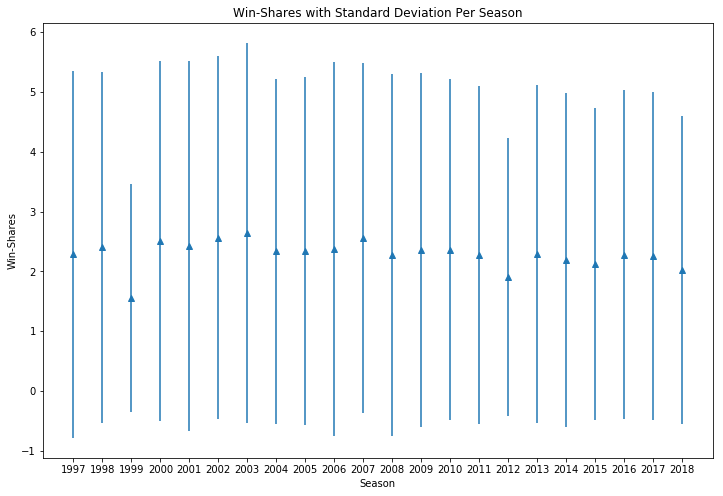

In [217]:
plt.figure(figsize=(12,8))
plt.errorbar(seasons, wsmean, wsstd, linestyle='None', marker='^')
plt.xlabel('Season')
plt.ylabel('Win-Shares')
plt.xticks(seasons, seasons)
plt.title('Win-Shares with Standard Deviation Per Season')


Text(0.5, 0, 'Win Shares')

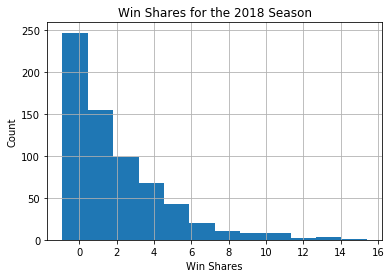

In [218]:
advanced[advanced['Season'] == 2018]['WS'].hist(bins=12)
plt.title('Win Shares for the 2018 Season')
plt.ylabel('Count')
plt.xlabel('Win Shares')

In [219]:
def plot_histogram(df, colname, season, bins=10, xlabel = None, alpha = .25):
    '''
    Plots a histogram of the dataframe, based on the column name and the season
    df: input dataframe (pandas dataframe)
    colname: e.g., 'WS' for Win shares (string)
    season: e.g, 2018 (integer)
    
    Returns: Nothing
    '''
    df[df['Season'] == season][colname].hist(bins=bins)
    plt.title('Win Shares for the ' + str(season) + ' Season')
    plt.ylabel('Count')
    plt.xlabel(xlabel)

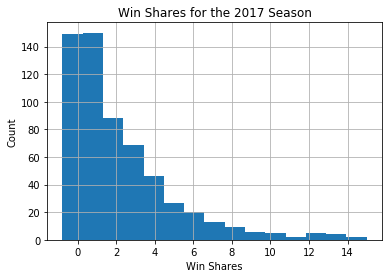

In [220]:
plot_histogram(advanced, 'WS', 2017, bins=15, xlabel = "Win Shares")

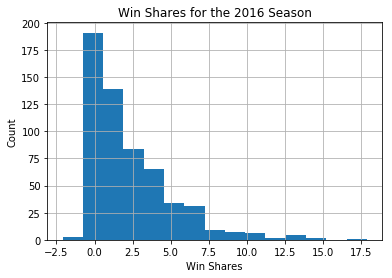

In [221]:
plot_histogram(advanced, 'WS', 2016, bins=15, xlabel = "Win Shares")

Man, who sucked so much in 2016?

In [222]:
advanced[advanced['Season']==2016]['WS'].min()

-2.1

In [223]:
advanced[(advanced['Season']==2016) & (advanced['WS']== -2.1)]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season
389,318,Emmanuel Mudiay,PG,19,DEN,68,2068,9.9,0.437,0.256,...,25.7,-3.3,1.2,-2.1,-0.049,-3.1,-1.2,-4.3,-1.2,2016


Oh no, maybe Emmanuel should have gone to SMU instead of China

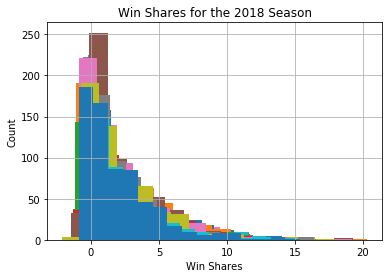

In [134]:
for season in seasons:
    plot_histogram(advanced, 'WS', season, bins=15, xlabel = "Win Shares", alpha = .02)

Let's do some **NAN** filling

In [224]:
advancednans = advanced[advanced.isnull().any(axis=1)]

So it appears that the most **anyone** played in the entire season with a NAN in the advanced stats is 33 minutes, and the average is 4.78 minutes

In [225]:
advancednans.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,67.0,223.761194,142.216554,9.000,89.50000,238.0000,349.50000,492.000
Age,67.0,26.164179,4.084698,20.000,23.00000,25.0000,28.50000,39.000
G,67.0,1.626866,0.966653,1.000,1.00000,1.0000,2.00000,5.000
MP,67.0,4.701493,5.755142,0.000,1.00000,3.0000,5.50000,33.000
PER,62.0,-0.325806,15.038246,-54.400,-3.67500,0.0000,4.17500,39.800
TS%,4.0,0.639000,0.142000,0.568,0.56800,0.5680,0.63900,0.852
3PAr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FTr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORB%,62.0,4.850000,15.081905,0.000,0.00000,0.0000,0.00000,100.000
DRB%,62.0,12.372581,24.110287,0.000,0.00000,0.0000,14.15000,100.000


In [226]:
advanced.isna().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
MP         0
PER        5
TS%       63
3PAr      67
FTr       67
ORB%       5
DRB%       5
TRB%       5
AST%       5
STL%       5
BLK%       5
TOV%      52
USG%       5
OWS        0
DWS        0
WS         0
WSp48      5
OBPM       0
DBPM       0
BPM        0
VORP       0
Season     0
dtype: int64

These five players have a lot of NANs, given that they each played less than a minute, I will just fill with zeroes.

In [227]:
advanced[advanced['PER'].isnull()].T

,442,125,326,119,253
Rk,365,98,247,99,211
Player,Alex Scales,Josh Davis,Stephane Lasme,JamesOn Curry,Damion James
Pos,SG,PF,SF,PG,SF
Age,27,25,25,24,25
Tm,SAS,HOU,GSW,LAC,BRK
G,1,1,1,1,2
MP,0,0,0,0,0
PER,NaN,NaN,NaN,NaN,NaN
TS%,NaN,NaN,NaN,NaN,NaN
3PAr,NaN,NaN,NaN,NaN,NaN


In [228]:
advanced[advanced['TS%'].isnull()].T

,44,167,19,56,250,463,43,502,103,221,...,590,143,500,123,60,248,428,602,404,378
Rk,34,126,17,57,251,83,38,436,85,193,...,447,131,412,112,51,204,348,492,329,307
Player,Bruce Bowen,Matt Fish,Vincent Askew,Adrian Caldwell,Michael McDonald,William Cunningham,Etdrick Bohannon,Trevor Winter,William Cunningham,Randell Jackson,...,Ronny Turiaf,James Ennis,Jarnell Stokes,Sam Dekker,Andrew Bogut,Danuel House,Ben Moore,Rashad Vaughn,Trey McKinney-Jones,Tyler Lydon
Pos,SF,C,SG,PF,C,C,SF,C,C,PF,...,C,SF,C,PF,C,SG,PF,SG,SG,PF
Age,25,27,30,31,28,23,25,25,24,24,...,32,25,22,21,32,23,22,21,27,21
Tm,MIA,MIA,NJN,DAL,CHH,PHI,WAS,MIN,TOR,DAL,...,MIN,MIA,MEM,HOU,CLE,WAS,IND,BRK,IND,DEN
G,1,1,1,1,1,1,2,1,1,1,...,2,3,2,3,1,1,2,1,1,1
MP,1,1,7,3,4,1,4,5,1,1,...,19,7,4,6,1,1,9,4,1,2
PER,37.7,0,-2.3,0,-22.1,33.3,0,-4.3,0,0,...,4.3,2.4,13.6,10.8,-35.3,12.2,-2.3,4.1,0,0
TS%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3PAr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
advanced[advanced['TOV%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season
44,34,Bruce Bowen,SF,25,MIA,1,1,37.7,NaN,NaN,...,0.0,0.0,0.0,0.0,0.321,-10.6,46.8,36.2,0.0,1997
167,126,Matt Fish,C,27,MIA,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.025,-6.5,1.3,-5.2,0.0,1997
19,17,Vincent Askew,SG,30,NJN,1,7,-2.3,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.022,-6.7,-0.6,-7.3,0.0,1997
56,57,Adrian Caldwell,PF,31,DAL,1,3,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.022,-7.3,-0.6,-7.9,0.0,1998
463,83,William Cunningham,C,23,PHI,1,1,33.3,NaN,NaN,...,0.0,0.0,0.0,0.0,0.473,-17.3,-4.8,-22.1,0.0,1998
43,38,Etdrick Bohannon,SF,25,WAS,2,4,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.017,-6.1,0.0,-6.1,0.0,1999
502,436,Trevor Winter,C,25,MIN,1,5,-4.3,NaN,NaN,...,0.0,0.0,0.0,0.0,0.202,-7.8,-4.0,-11.8,0.0,1999
103,85,William Cunningham,C,24,TOR,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.025,-6.2,-1.3,-7.5,0.0,1999
221,193,Randell Jackson,PF,24,DAL,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.025,-5.8,-0.4,-6.1,0.0,2000
382,309,Andy Panko,SF,23,ATL,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.017,-6.3,0.0,-6.4,0.0,2001


In [230]:
pergamenan = pergame[pergame.isnull().any(axis=1)]

In [231]:
pergamenan.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,2438.0,235.211239,134.164339,1.0,115.000,246.000,348.000,539.0
Age,2438.0,27.029943,4.353427,18.0,24.000,26.000,30.000,44.0
G,2438.0,26.621821,24.738014,1.0,5.000,18.000,45.000,85.0
GS,2438.0,9.287941,18.741091,0.0,0.000,0.000,7.000,83.0
MP,2438.0,11.715751,8.116843,0.0,5.500,9.500,15.900,42.0
FG,2438.0,1.390156,1.365301,0.0,0.500,1.000,1.900,11.2
FGA,2438.0,2.992084,2.563892,0.0,1.300,2.200,3.800,19.1
FG%,2371.0,0.433864,0.181478,0.0,0.357,0.460,0.524,1.0
3P,2438.0,0.031419,0.164085,0.0,0.000,0.000,0.000,3.0
3PA,2438.0,0.113700,0.420076,0.0,0.000,0.000,0.000,5.0


In [232]:
pergamenan.head().T

,547,144,74,220,292
Rk,420,109,56,166,217
Player,Aaron Williams,Acie Earl,Adrian Caldwell,Alan Henderson,Alton Lister
Pos,C,C,PF,PF,C
Age,25,26,30,24,38
Tm,DEN,MIL,PHI,ATL,BOS
G,1,9,27,30,53
GS,0,0,0,0,2
MP,10,4.8,13.5,16.7,9.7
FG,3,0.9,1.1,2.6,0.6
FGA,5,2.6,2.1,5.4,1.5


So players who haven't taken a 3, field goal, or free throw are likely the ones generating NANs.  Let's confirm.

In [233]:
pergamenan.isna().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         67
3P           0
3PA          0
3P%       2154
2P           0
2PA          0
2P%        104
eFG%        67
FT           0
FTA          0
FT%        587
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PS/G         0
Season       0
dtype: int64

In [234]:
len(pergamenan[pergamenan['3PA']==0])
    

2154

In [235]:
len(pergamenan[pergamenan['FGA']==0])

67

In [236]:
len(pergamenan[pergamenan['FTA']==0])

587

In [237]:
len(pergamenan[pergamenan['2PA']==0])

104

Looks like it, those numbers match-up.  And they appear to be many low-minutes players.

In [238]:
pergamenan[pergamenan['2PA']==0][['Player', 'MP']]

,Player,MP
44,Bruce Bowen,1.0
167,Matt Fish,1.0
19,Vincent Askew,7.0
76,Adrian Caldwell,3.0
292,Michael McDonald,4.0
108,William Cunningham,1.0
484,Brandon Williams,1.3
43,Etdrick Bohannon,2.0
502,Trevor Winter,5.0
477,Tyson Wheeler,3.0


In [179]:
def clean_and_join_seasonal_dataframe(df_pergame, df_advanced):
    '''
    Fills the seasonal dataframes with 0 for their nans and returns a joined dataframe
    Inputs: df_pergame dataframe, read in by read_pergame_season_stats
            df_advanced dataframe, read in by read_advanced_season_stats
    
    Returns: combined dataframe of pergame and advanced stats
    '''
    #Based on EDA, most of the stats with NANs come from low-minutes players who haven't done much in-game
    #also, using the fill in-place because I've had trouble with fillna not working in the past.
    #df_pergame.fillna(0, inplace=True)
    #df_advanced.fillna(0, inplace=True)
    
    #From the EDA, we're missing advanced stats for 71 players from the 1997 season, so I'm going to cull those out
    #probably just from the analysis overall
    joined_df = pd.merge(df_pergame,df_advanced)
    
    
    

In [182]:
len(notinadvanced)

71

In [181]:
advanced[advanced['Player']=='Acie Earl']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season


In [240]:
advanced[advanced['Player']=='Jae Crowder']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season
115,93,Jae Crowder,SF,22,DAL,78,1353,10.2,0.491,0.523,...,15.1,0.2,1.3,1.5,0.055,-0.9,0.4,-0.5,0.5,2013
141,107,Jae Crowder,SF,23,DAL,78,1254,11.9,0.551,0.510,...,13.2,1.2,1.1,2.3,0.089,0.0,0.6,0.6,0.8,2014
129,108,Jae Crowder,SF,24,TOT,82,1647,13.9,0.517,0.382,...,17.5,1.9,2.0,3.9,0.113,-0.1,0.6,0.6,1.1,2015
130,108,Jae Crowder,SF,24,DAL,25,265,12.7,0.550,0.500,...,15.3,0.3,0.3,0.5,0.098,0.6,0.5,1.1,0.2,2015
131,108,Jae Crowder,SF,24,BOS,57,1382,14.1,0.512,0.362,...,17.9,1.6,1.8,3.3,0.116,-0.2,0.7,0.5,0.9,2015
110,101,Jae Crowder,SF,25,BOS,73,2308,15.8,0.565,0.446,...,18.5,3.8,3.5,7.3,0.152,1.5,1.3,2.8,2.8,2016
117,95,Jae Crowder,SF,26,BOS,72,2335,14.9,0.613,0.547,...,17.0,4.1,2.5,6.7,0.137,1.4,0.2,1.6,2.1,2017
140,118,Jae Crowder,SF,27,TOT,80,2090,10.4,0.525,0.508,...,17.3,1.0,1.6,2.6,0.060,-0.8,-0.9,-1.7,0.1,2018
141,118,Jae Crowder,SF,27,CLE,53,1346,10.2,0.545,0.503,...,15.1,1.1,0.6,1.7,0.059,-0.6,-1.2,-1.8,0.1,2018
142,118,Jae Crowder,SF,27,UTA,27,744,10.8,0.499,0.515,...,21.3,-0.1,1.0,0.9,0.060,-1.3,-0.4,-1.6,0.1,2018


In [246]:
pergame[pergame['Tm']=='TOT']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season
195,148,A.C. Green,PF,33,TOT,83,73,30.0,2.8,5.8,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
333,252,Aaron McKie,SG,24,TOT,83,11,19.6,1.8,4.4,...,0.5,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997
546,420,Aaron Williams,PF-C,25,TOT,33,1,17.1,2.6,4.5,...,1.9,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997
142,109,Acie Earl,C,26,TOT,47,0,10.6,1.4,3.8,...,0.7,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997
72,56,Adrian Caldwell,PF,30,TOT,45,0,12.6,0.9,2.0,...,1.3,2.4,3.7,0.3,0.4,0.2,0.6,1.9,2.2,1997
182,139,Anthony Goldwire,PG,25,TOT,60,30,19.8,2.2,5.5,...,0.2,1.2,1.4,3.7,0.6,0.0,1.3,1.7,6.5,1997
509,389,Brooks Thompson,PG,26,TOT,67,6,15.7,2.4,6.1,...,0.3,1.2,1.4,2.7,0.8,0.0,1.3,1.9,6.6,1997
85,64,Cedric Ceballos,SF,27,TOT,50,40,28.5,5.6,12.3,...,2.0,4.6,6.6,1.3,0.7,0.5,1.7,2.3,14.6,1997
175,134,Chris Gatling,PF,29,TOT,47,1,27.3,7.0,13.3,...,2.9,5.0,7.9,0.6,0.8,0.7,2.6,2.9,19.0,1997
53,41,Chucky Brown,SF,28,TOT,70,1,10.8,1.1,2.2,...,0.6,1.5,2.1,0.4,0.1,0.3,0.3,1.4,2.9,1997


In [245]:
pd.merge(advanced, pergame, how='left', left_on=['Player'], right_on = ['Player']).head(5).T

,0,1,2,3,4
Rk_x,148,148,148,148,148
Player,A.C. Green,A.C. Green,A.C. Green,A.C. Green,A.C. Green
Pos_x,PF,PF,PF,PF,PF
Age_x,33,33,33,33,33
Tm_x,TOT,TOT,TOT,TOT,TOT
G_x,83,83,83,83,83
MP_x,2492,2492,2492,2492,2492
PER,12.4,12.4,12.4,12.4,12.4
TS%,0.523,0.523,0.523,0.523,0.523
3PAr,0.041,0.041,0.041,0.041,0.041


In [286]:
df0607adv = read_advanced_season_stats('../data/advanced/2006-2007_player_advanced.csv')

In [287]:
df0607pg = read_pergame_season_stats('../data/per_game/2006-2007_Player_per_game.csv')

In [288]:
for player in df0607adv[df0607adv['Tm']=='TOT']['Player']:
    #print("Player", player, df0607adv[df0607adv['Player']==player]['Tm'].unique())
    teams = list(df0607adv[df0607adv['Player']==player]['Tm'].unique())
    teams.remove('TOT')
    print(teams)

['UTA', 'PHI']
['MIL', 'DEN']
['DEN', 'MIL']
['MEM', 'LAC']
['GSW', 'IND']
['POR', 'TOR']
['GSW', 'IND']
['CHA', 'SAS']
['IND', 'GSW']
['SAC', 'LAC']
['DEN', 'MIL']
['PHI', 'DEN']
['LAC', 'TOR']
['IND', 'GSW']
['IND', 'GSW']
['DAL', 'ATL']
['MEM', 'MIA']
['TOR', 'POR']
['GSW', 'IND']
['DEN', 'PHI']
['GSW', 'IND']
['HOU', 'MEM']
['IND', 'GSW']
['ATL', 'POR']
['CHA', 'NJN']
['DEN', 'PHI']
['MEM', 'HOU']
['PHI', 'DET']
['SAS', 'CHA']


In [258]:
deduped = df0607adv.drop_duplicates(subset=['Player'])

In [289]:
deduped[deduped['Player']=='Chris Webber']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
482,429,Chris Webber,PF,33,TOT,61,1821,16.0,0.482,0.017,...,0.7,2.7,3.4,0.09,-0.8,2.2,1.4,1.5,2007,


In [290]:
df0607adv[df0607adv['Player']=='Chris Webber']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
482,429,Chris Webber,PF,33,TOT,61,1821,16.0,0.482,0.017,...,0.7,2.7,3.4,0.090,-0.8,2.2,1.4,1.5,2007,
483,429,Chris Webber,PF,33,PHI,18,544,13.8,0.409,0.022,...,-0.6,0.8,0.2,0.014,-2.9,2.2,-0.7,0.2,2007,
484,429,Chris Webber,PF,33,DET,43,1277,16.9,0.520,0.015,...,1.3,1.9,3.3,0.123,0.1,2.1,2.2,1.4,2007,


In [292]:
df0607adv = reduce_traded_players_to_one_row(df0607adv)

Should append:  UTA,PHI
Should append:  MIL,DEN
Should append:  DEN,MIL
Should append:  MEM,LAC
Should append:  GSW,IND
Should append:  POR,TOR
Should append:  GSW,IND
Should append:  CHA,SAS
Should append:  IND,GSW
Should append:  SAC,LAC
Should append:  DEN,MIL
Should append:  PHI,DEN
Should append:  LAC,TOR
Should append:  IND,GSW
Should append:  IND,GSW
Should append:  DAL,ATL
Should append:  MEM,MIA
Should append:  TOR,POR
Should append:  GSW,IND
Should append:  DEN,PHI
Should append:  GSW,IND
Should append:  HOU,MEM
Should append:  IND,GSW
Should append:  ATL,POR
Should append:  CHA,NJN
Should append:  DEN,PHI
Should append:  MEM,HOU
Should append:  PHI,DET
Should append:  SAS,CHA


In [293]:
df0607adv[df0607adv['Player'] == 'Chris Webber']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
482,429,Chris Webber,PF,33,TOT,61,1821,16.0,0.482,0.017,...,0.7,2.7,3.4,0.09,-0.8,2.2,1.4,1.5,2007,"PHI,DET"


In [311]:
advanced = read_all_advanced('../data/advanced')
pergame = read_all_pergame('../data/per_game')

In [312]:
advanced

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,...,2.4,2.4,4.8,0.093,-1.8,0.7,-1.1,0.6,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"
546,420,Aaron Williams,PF-C,25,TOT,33,563,16.4,0.599,0.007,...,0.7,0.4,1.1,0.098,-1.7,-0.4,-2.0,0.0,1997,"DEN,VAN"
142,109,Acie Earl,C,26,TOT,47,500,10.7,0.433,0.028,...,-0.5,0.5,0.0,-0.004,-6.2,-0.4,-6.6,-0.6,1997,"TOR,MIL"
261,195,Adam Keefe,C,26,UTA,62,915,11.7,0.572,0.006,...,1.0,1.3,2.3,0.118,-1.1,0.9,-0.2,0.4,1997,UTA
72,56,Adrian Caldwell,PF,30,TOT,45,569,7.5,0.443,0.022,...,-0.2,0.4,0.2,0.016,-5.2,-0.9,-6.1,-0.6,1997,"NJN,PHI"
220,166,Alan Henderson,PF,24,ATL,30,501,15.0,0.510,0.000,...,0.5,0.9,1.3,0.126,-2.0,0.3,-1.7,0.0,1997,ATL
131,100,Aleksandar Djordjevic,SG,29,POR,8,61,12.5,0.687,0.438,...,0.1,0.0,0.1,0.114,-0.4,-3.4,-3.8,0.0,1997,POR
230,174,Allan Houston,SG,25,NYK,81,2681,11.3,0.531,0.372,...,1.5,3.2,4.7,0.084,-0.5,-1.0,-1.5,0.4,1997,NYK
237,179,Allen Iverson*,PG,21,PHI,76,3045,18.0,0.513,0.303,...,3.1,1.0,4.1,0.065,3.4,-2.0,1.5,2.7,1997,PHI


In [313]:
pergame

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,73,30.0,2.8,5.8,...,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,11,19.6,1.8,4.4,...,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997,"POR,DET"
546,420,Aaron Williams,PF-C,25,TOT,33,1,17.1,2.6,4.5,...,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997,"DEN,VAN"
142,109,Acie Earl,C,26,TOT,47,0,10.6,1.4,3.8,...,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997,"TOR,MIL"
261,195,Adam Keefe,C,26,UTA,62,0,14.8,1.3,2.6,...,2.3,3.5,0.5,0.5,0.2,0.7,1.6,3.8,1997,UTA
72,56,Adrian Caldwell,PF,30,TOT,45,0,12.6,0.9,2.0,...,2.4,3.7,0.3,0.4,0.2,0.6,1.9,2.2,1997,"NJN,PHI"
220,166,Alan Henderson,PF,24,ATL,30,0,16.7,2.6,5.4,...,2.3,3.9,0.8,0.7,0.2,1.0,2.4,6.6,1997,ATL
131,100,Aleksandar Djordjevic,SG,29,POR,8,0,7.6,1.0,2.0,...,0.5,0.6,0.6,0.0,0.0,0.6,0.4,3.1,1997,POR
230,174,Allan Houston,SG,25,NYK,81,81,33.1,5.4,12.7,...,2.4,3.0,2.2,0.5,0.2,2.1,2.9,14.8,1997,NYK
237,179,Allen Iverson*,PG,21,PHI,76,74,40.1,8.2,19.8,...,2.6,4.1,7.5,2.1,0.3,4.4,3.1,23.5,1997,PHI
